In [70]:
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt
import arviz as az

Ex. 1

In [71]:
gen_quant = CmdStanModel(stan_file="model1.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [72]:
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
print(samples.summary())

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:02 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



       Mean    MCSE        StdDev       5%   50%    95%  N_Eff  N_Eff/s  R_hat
name                                                                          
lp__   0.00     NaN  0.000000e+00   0.0000   0.0   0.00    NaN      NaN    NaN
N     50.00     NaN  1.700000e-13  50.0000  50.0  50.00    NaN      NaN    NaN
y      7.90  0.2900  8.800000e+00   0.0000   5.0  26.00  920.0  71000.0    1.0
p      0.16  0.0055  1.700000e-01   0.0023   0.1   0.54  930.0  72000.0    1.0


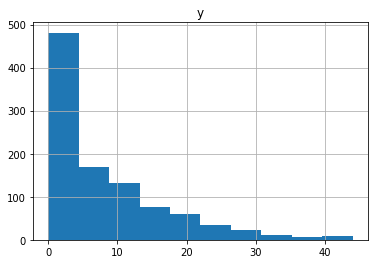

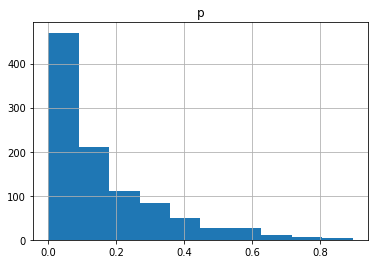

In [73]:
df1 = samples.draws_pd()
df1.hist(column='y')
df1.hist(column='p')
plt.show()

I choose beta distribution parameters (0.6, 3) to make compromise between fitting to given mean probability which is 20%  and y which should be 7.

Ex. 2

In [74]:
gen_quant = CmdStanModel(stan_file="model2.stan")

INFO:cmdstanpy:found newer exe file, not recompiling


In [75]:
samples = gen_quant.sample(data = {'N':50, 'y':7},
                           fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
print(samples.summary())

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.



         Mean   MCSE        StdDev     5%    50%    95%  N_Eff  N_Eff/s  R_hat
name                                                                          
lp__     0.00    NaN  0.000000e+00   0.00   0.00   0.00    NaN      NaN    NaN
p        0.82    NaN  1.700000e-15   0.82   0.82   0.82    NaN      NaN    NaN
y_pred  41.00  0.085  2.600000e+00  36.00  41.00  45.00  960.0  87000.0    1.0


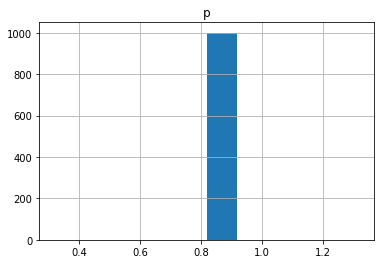

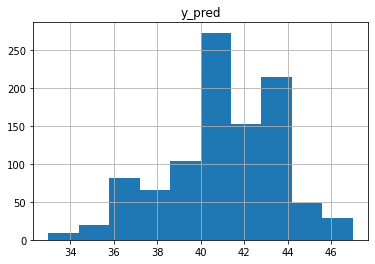

In [76]:
df1 = samples.draws_pd()
df1.hist(column='p')
df1.hist(column='y_pred')
plt.show()

In [77]:
arviz_samples = az.from_cmdstanpy(samples)
print(arviz_samples.posterior)

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000)
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    p        (chain, draw) float64 0.8194 0.8194 0.8194 ... 0.8194 0.8194 0.8194
    y_pred   (chain, draw) float64 41.0 43.0 42.0 45.0 ... 42.0 41.0 41.0 38.0
Attributes:
    created_at:                 2023-03-28T16:51:07.904397
    arviz_version:              0.12.0
    inference_library:          cmdstanpy
    inference_library_version:  1.0.1


In [78]:
print(az.hdi(arviz_samples))

<xarray.Dataset>
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 'lower' 'higher'
Data variables:
    p        (hdi) float64 0.8194 0.8194
    y_pred   (hdi) float64 36.0 45.0


In [79]:
print(arviz_samples.mean()["posterior"])

<xarray.Dataset>
Dimensions:  ()
Data variables:
    p        float64 0.8194
    y_pred   float64 40.96
